<a href="https://colab.research.google.com/github/MilizCom/Machine-Learning/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Step 1: Install necessary libraries
!pip install scikit-learn matplotlib

# Step 2: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor # Import the regressor

In [6]:
df = pd.read_csv('StudentGradesAndPrograms.csv')

<ipython-input-6-273de6edecb6>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('StudentGradesAndPrograms.csv')


In [7]:

# Step 5: Check if there are any non-numeric columns (this step will help debug issues)
print("Data types of the columns:\n", df.dtypes)


Data types of the columns:
 schoolyear          object
gradeLevel          object
classPeriod         object
classType           object
schoolName          object
gradePercentage    float64
avid                object
sped                object
migrant             object
ell                 object
student_ID          object
dtype: object


In [8]:
# Check if there are any non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("\nNon-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['schoolyear', 'gradeLevel', 'classPeriod', 'classType', 'schoolName',
       'avid', 'sped', 'migrant', 'ell', 'student_ID'],
      dtype='object')


In [9]:
# Step 4: Encode categorical variables
le = LabelEncoder()
df['classType'] = le.fit_transform(df['classType'])
df['avid'] = le.fit_transform(df['avid'])
df['sped'] = le.fit_transform(df['sped'])
df['migrant'] = le.fit_transform(df['migrant'])
df['ell'] = le.fit_transform(df['ell'])


In [10]:

# Step 5: Ensure columns like 'gradeLevel' and 'classPeriod' are numeric
df['gradeLevel'] = pd.to_numeric(df['gradeLevel'], errors='coerce')
df['classPeriod'] = pd.to_numeric(df['classPeriod'], errors='coerce')


In [11]:
# Step 6: Remove non-numeric columns such as 'student_ID', 'schoolyear', 'schoolName'
X = df.drop(['student_ID', 'schoolyear', 'schoolName'], axis=1)
y = df['gradePercentage']


In [12]:

# Step 7: Check for NaN values
print("\nChecking for NaN values:\n", X.isnull().sum())

# Step 8: Impute missing values (if any)
# We'll use SimpleImputer to fill NaN values with the median of each column
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 9: Verify that there are no NaN values left
print("\nAfter imputing, checking for NaN values:\n", X_imputed.isnull().sum())



Checking for NaN values:
 gradeLevel         12514
classPeriod           13
classType              0
gradePercentage        0
avid                   0
sped                   0
migrant                0
ell                    0
dtype: int64

After imputing, checking for NaN values:
 gradeLevel         0
classPeriod        0
classType          0
gradePercentage    0
avid               0
sped               0
migrant            0
ell                0
dtype: int64


In [13]:
# Step 10: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

In [14]:
# Step 11: Find the best and worst K for KNN - Using KNeighborsRegressor for continuous target
from sklearn.neighbors import KNeighborsRegressor # Import the regressor

best_k = None
worst_k = None
best_accuracy = 0  # Initialize with a low value for accuracy (e.g., 0 for R-squared)
worst_accuracy = float('inf')  # Initialize with a high value for accuracy

for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)  # Use KNeighborsRegressor
    knn.fit(X_train, y_train)

    # Use a suitable metric for regression, like R-squared or Mean Squared Error
    # Here, we'll use R-squared
    accuracy = knn.score(X_test, y_test)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

    if accuracy < worst_accuracy:
        worst_accuracy = accuracy
        worst_k = k

print(f"Best k: {best_k}, Best Accuracy (R-squared): {best_accuracy}")
print(f"Worst k: {worst_k}, Worst Accuracy (R-squared): {worst_accuracy}")

Best k: 2, Best Accuracy (R-squared): 0.9998373007805335
Worst k: 19, Worst Accuracy (R-squared): 0.9252755756713744


In [16]:
# Step 12: Train and test with the best K
knn_best = KNeighborsRegressor(n_neighbors=best_k) # Changed to KNeighborsRegressor
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

# Step 13: Train and test with the worst K
knn_worst = KNeighborsRegressor(n_neighbors=worst_k) # Changed to KNeighborsRegressor
knn_worst.fit(X_train, y_train)
y_pred_worst = knn_worst.predict(X_test)

In [20]:
# Step 14: Regression Metrics for best K
print("Best K:", best_k)
print("MSE (Best K):", mean_squared_error(y_test, y_pred_best))
print("R2 Score (Best K):", r2_score(y_test, y_pred_best))

# Step 15: Regression Metrics for worst K
print("\nWorst K:", worst_k)
print("MSE (Worst K):", mean_squared_error(y_test, y_pred_worst))
print("R2 Score (Worst K):", r2_score(y_test, y_pred_worst))

Best K: 2
MSE (Best K): 0.09978363322774834
R2 Score (Best K): 0.9998373007805335

Worst K: 19
MSE (Worst K): 45.82858218258053
R2 Score (Worst K): 0.9252755756713744


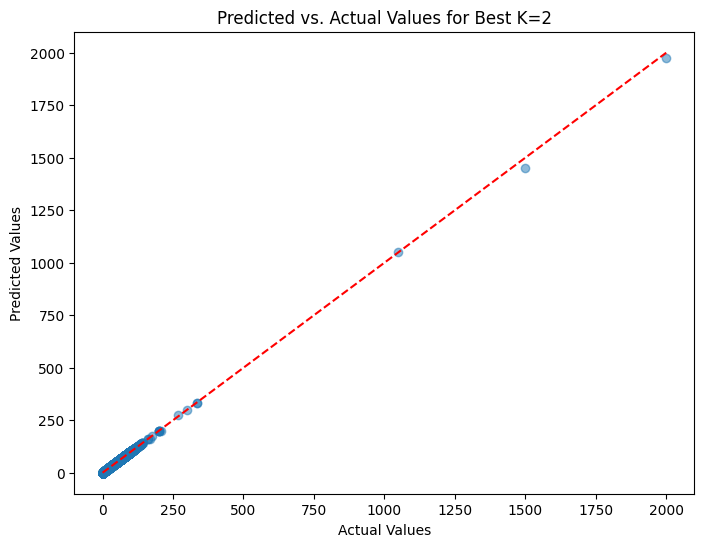

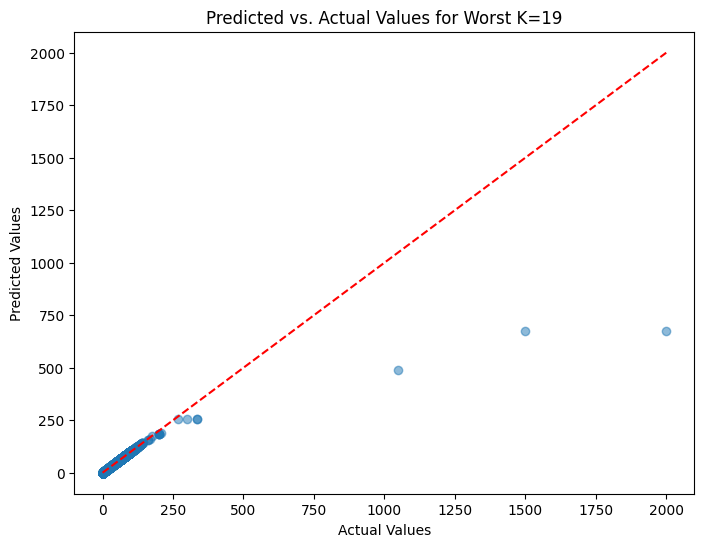

In [22]:
# Step 16: Visualize Predicted vs. Actual Values for best K
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values for Best K={best_k}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

# Step 17: Visualize Predicted vs. Actual Values for worst K
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_worst, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Predicted vs. Actual Values for Worst K={worst_k}")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

Comparison of Different Distance Metrics:

Euclidean Distance:
MSE: 0.09978363322774834
R2: 0.9998373007805335

Manhattan Distance:
MSE: 0.11121250849931168
R2: 0.9998186657697015

Minkowski Distance:
MSE: 0.09978363322774834
R2: 0.9998373007805335


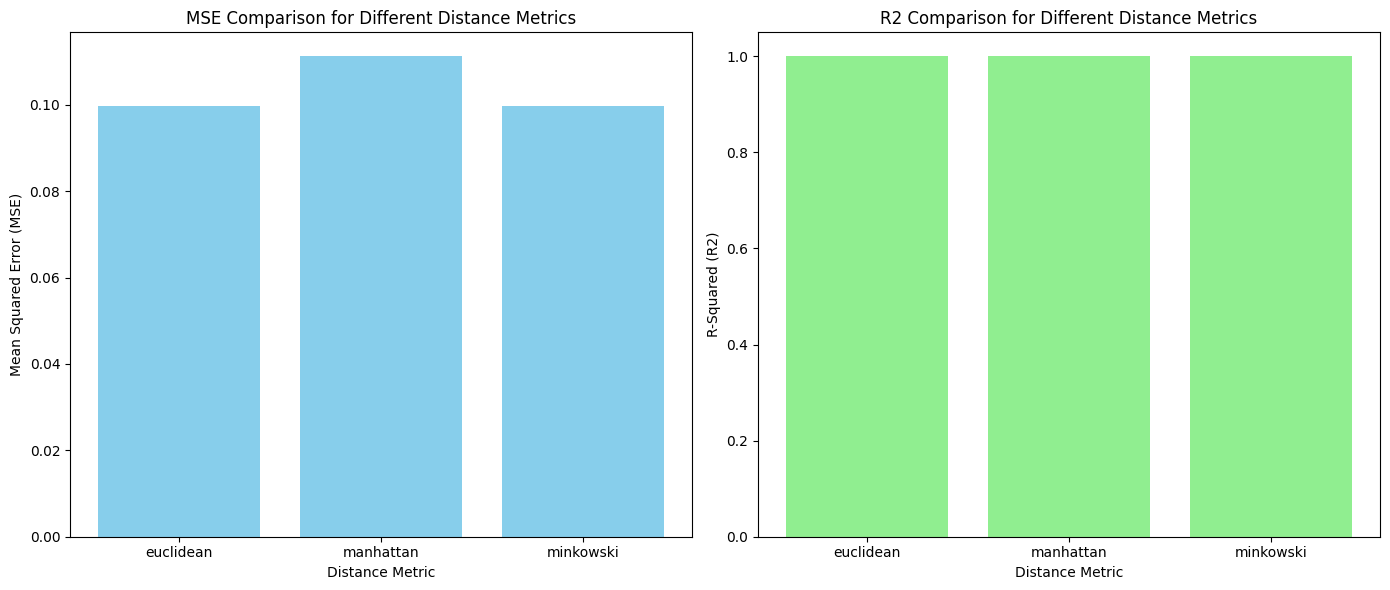

In [23]:

# Step 9: Train and test with different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']
results = {}

for metric in metrics:
    # Train the model with each metric
    knn = KNeighborsRegressor(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    results[metric] = {'MSE': mse, 'R2': r2}

# Step 10: Compare results
print("Comparison of Different Distance Metrics:")
for metric, result in results.items():
    print(f"\n{metric.capitalize()} Distance:")
    print(f"MSE: {result['MSE']}")
    print(f"R2: {result['R2']}")

# Step 11: Visualize the comparison
metrics = list(results.keys())
mse_values = [results[metric]['MSE'] for metric in metrics]
r2_values = [results[metric]['R2'] for metric in metrics]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot MSE
ax[0].bar(metrics, mse_values, color='skyblue')
ax[0].set_title("MSE Comparison for Different Distance Metrics")
ax[0].set_xlabel("Distance Metric")
ax[0].set_ylabel("Mean Squared Error (MSE)")

# Plot R2
ax[1].bar(metrics, r2_values, color='lightgreen')
ax[1].set_title("R2 Comparison for Different Distance Metrics")
ax[1].set_xlabel("Distance Metric")
ax[1].set_ylabel("R-Squared (R2)")

plt.tight_layout()
plt.show()